In [5]:
import scipy as sp
import scipy.linalg as la
import numpy as np
import pickle
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch.nn.init as init
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.patheffects as PathEffects

In [6]:
import cvxpy as cp

import skimage.measure

from sklearn import preprocessing,svm,metrics
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, SpectralClustering, SpectralBiclustering, SpectralCoclustering
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import NMF,PCA
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.manifold import TSNE
from sklearn.metrics.cluster import adjusted_rand_score,adjusted_mutual_info_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy import stats
from scipy.stats import entropy
from scipy import signal
import itertools

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AR

In [8]:
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization! 

In [9]:
X = list(range(-100,100))
Y = list(range(-100,100))

In [10]:
X,Y = np.meshgrid(X,Y)

In [11]:
Z = X**2-Y**2

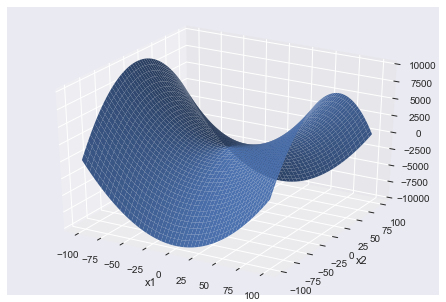

In [14]:
fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_surface(X,Y,Z)
#ax.set_zlim(-100, 100)
#plt.axis('off')
#plt.rc('text', usetex=True)
plt.xlabel('x1')
plt.ylabel('x2')
#plt.legend('x_1^2-x_2^2')
plt.savefig('saddle.png')
plt.show()

In [143]:
d = 16
l = d
Delta = 1
c = 1
epsilon = 0.05
delta = 0.05
rho = 2

In [144]:
kai = 3*max(np.log(d*l*Delta/c/epsilon**2/delta),4)
kai

43.5971227954246

In [145]:
eta = c/l
eta

0.0625

In [146]:
r = np.sqrt(c)*epsilon/kai**2/l
r

1.644123224132174e-06

In [147]:
g_thres = np.sqrt(c)*epsilon/kai**2
g_thres

2.6305971586114784e-05

In [148]:
f_thres = c*np.sqrt(epsilon**3)/kai**3/np.sqrt(rho)
f_thres

9.540398648110462e-08

In [149]:
t_thres = kai*l/c**2/np.sqrt(rho*epsilon)
t_thres

2205.8593194174214

In [157]:
x = torch.FloatTensor(np.ones(d-1))
x =  Variable(x, requires_grad=True)
y = torch.FloatTensor(np.ones(1)*1e-20)
y =  Variable(y, requires_grad=True)

In [158]:
l_gd = []
t_noise = -t_thres-1
for i in range(200000):
    loss = torch.sigmoid(torch.sum(x**2)-y**2)
    loss.backward()

    with torch.no_grad():
        x = x - eta * x.grad
        y = y - eta * y.grad
    x.requires_grad = True
    y.requires_grad = True

    if i % 1 == 0:
        #print("Epoch: {} loss {}".format(i, loss.item()))
        l_gd.append(loss.item())
print(loss.item())

0.9999995231628418


In [159]:
x = torch.FloatTensor(np.ones(d-1))
x =  Variable(x, requires_grad=True)
y = torch.FloatTensor(np.ones(1)*1e-20)
y =  Variable(y, requires_grad=True)

In [160]:
l_pgd = []
t_noise = -t_thres-1
for i in range(200000):
    loss = torch.sigmoid(torch.sum(x**2)-y**2)
    loss.backward()
    
    if (torch.sum((x.grad)**2) + torch.sum((y.grad)**2)) <= g_thres**2 and i-t_noise > t_thres:
#        print('aa')
        t_noise = i
        temp1 = np.random.randn(d)
        temp2 = np.random.rand(1)*r
        temp = temp2*temp1/np.sqrt(np.sum(temp1**2))
        x.grad += torch.FloatTensor(temp[:d-1])/eta
        y.grad += torch.FloatTensor(temp[[-1]])/eta
    with torch.no_grad():
        x = x - eta * x.grad
        y = y - eta * y.grad
    x.requires_grad = True
    y.requires_grad = True
    
    if i % 1 == 0:
        #print("Epoch: {} loss {}".format(i, loss.item()))
        l_pgd.append(loss.item())


aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa


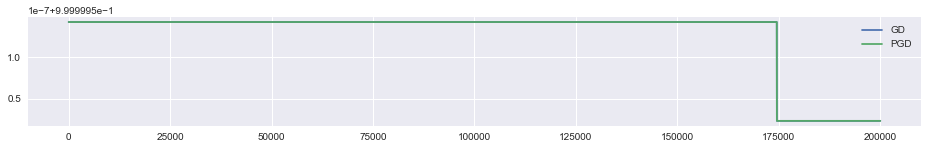

In [161]:
plt.figure(figsize=(16,2))
plt.plot(l_gd)
plt.plot(l_pgd)
plt.legend(['GD','PGD'])
#plt.savefig('./Figures/d='+str(d)+'.png')